# Clustering using DTW

## Preparations

In [116]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import math
from functools import reduce
sns.set()
%matplotlib inline
import os

### Read the data

In [117]:
#GRANULARITY = 'one_hour'
#GRANULARITY = 'thirty_min'
GRANULARITY = 'five_min'
#GRANULARITY = 'one_min'


PATH = 'data/cleaned/samples50/' + GRANULARITY + '/'
DIR_CONTENT = os.listdir(PATH)

In [118]:
column_names = list(map(lambda s: s.split('.')[0], DIR_CONTENT))

In [119]:
df = pd.DataFrame(columns=column_names)

In [120]:
for filename in DIR_CONTENT:
    _id = filename.split('.')[0]
    tmp_df = pd.read_csv(PATH + filename)
    df[_id] = tmp_df['heart_rate']

In [121]:
df.head(5)

,yyyyy_12,ggggg_4,eeeee_12,eeeee_13,xxxxx_8,yyyyy_13,yyyyy_11,eeeee_11,eeeee_10,yyyyy_10,...,xxxxx_3,eeeee_18,xxxxx_2,xxxxx_6,ttttt_3,ttttt_2,xxxxx_7,xxxxx_5,ttttt_1,xxxxx_4
0,0.000000,0.0,0.0,0.618519,0.0,0.0,0.000000,29.296296,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.183333,0.0,0.0,0.000000,14.210000,1.943333,0.0,...,0.0,3.366667,0.0,14.816667,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.863333,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,70.823333,0.0,0.0,0.0,0.0,0.0,0.0
3,14.123333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,65.673333,0.0,0.0,0.0,0.0,0.0,0.0
4,17.566667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,4.870000,0.0,...,0.0,0.000000,0.0,64.916667,0.0,0.0,0.0,0.0,0.0,0.0


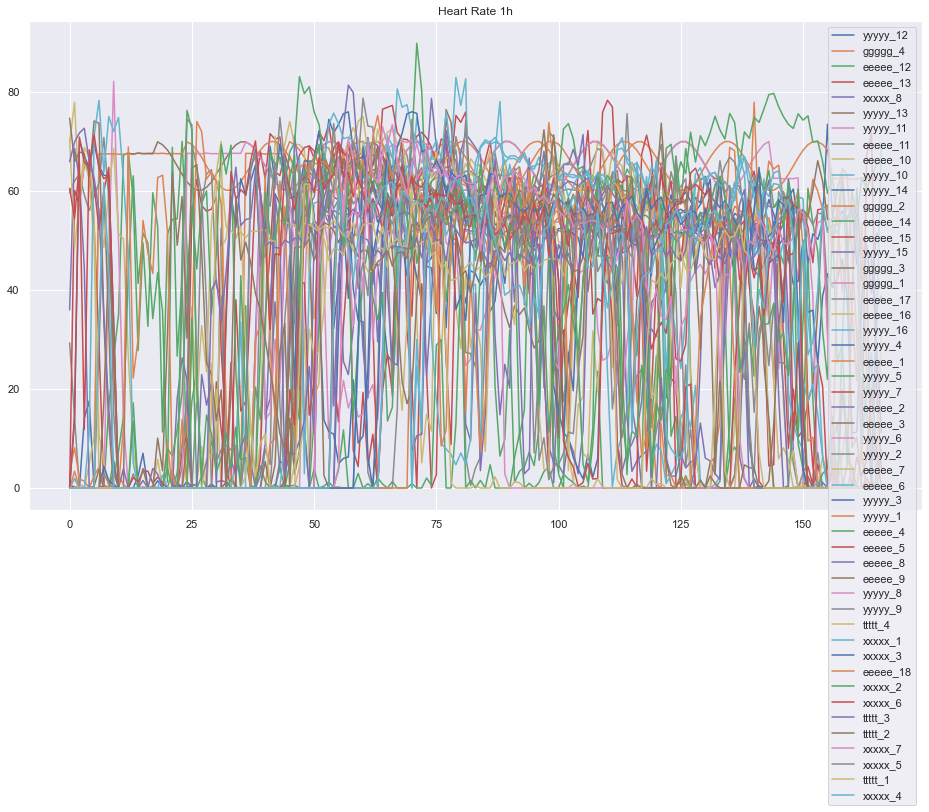

In [122]:
ax = df.plot(legend=True, title="Heart Rate 1h", figsize=(16,9))
fig = ax.get_figure()
#fig.savefig('/tmp/foo.png') # TODO

### Normalize the data

In [123]:
_mean = df.mean()
_std = df.std()

In [124]:
dfn = (df - _mean) / _std

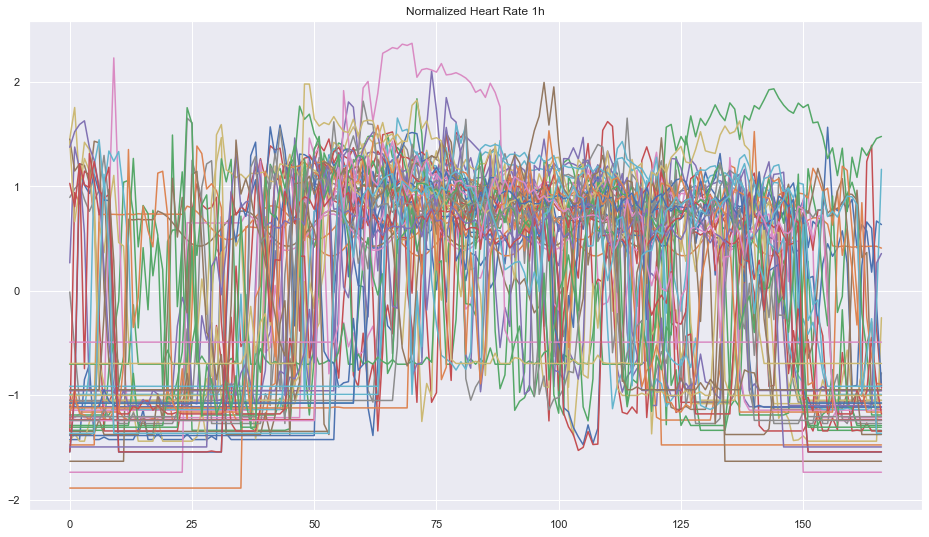

In [125]:
axn = dfn.plot(legend=False, title="Normalized Heart Rate 1h", figsize=(16,9))
fign = axn.get_figure()

## Calculate DTW

In [126]:
# https://dtaidistance.readthedocs.io/en/latest/index.html
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [127]:
dfnt = dfn.transpose()

In [128]:
np_ts = dfnt.to_numpy()

In [129]:
# Takes about 2min for 5min-granularity and >10min for 1min-granularity
dtw_matrix = dtw.distance_matrix(np_ts)

In [132]:
dtw_matrix

array([[ 0.        ,  5.31665209,  8.3772118 , ...,  8.28589013,
         8.67029252,  4.2420051 ],
       [ 5.31665209,  0.        , 12.62485294, ...,  9.89986138,
        13.20021187,  7.17638943],
       [ 8.3772118 , 12.62485294,  0.        , ...,  7.67706695,
         7.7001812 ,  4.2539713 ],
       ...,
       [ 8.28589013,  9.89986138,  7.67706695, ...,  0.        ,
         7.17413741,  4.06256343],
       [ 8.67029252, 13.20021187,  7.7001812 , ...,  7.17413741,
         0.        ,  7.46681828],
       [ 4.2420051 ,  7.17638943,  4.2539713 , ...,  4.06256343,
         7.46681828,  0.        ]])

## Create Clusters

In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from validclust.indices import dunn

from collections import defaultdict


In [135]:
cvi_lists = defaultdict(list)

for nbr_clusters in range(2, 21):
    tmp_model = KMeans(n_clusters=nbr_clusters, random_state=42)
    tmp_model.fit(dtw_matrix)
    tmp_cluster_labels = tmp_model.labels_
    
    sil_score = silhouette_score(dtw_matrix, tmp_cluster_labels)
    cvi_lists['sil'].append((nbr_clusters, sil_score))
    
    dunn_score = dunn(dtw_matrix, tmp_cluster_labels)
    cvi_lists['dunn'].append((nbr_clusters, dunn_score))
    
    db_score = davies_bouldin_score(dtw_matrix, tmp_cluster_labels)
    cvi_lists['db'].append((nbr_clusters, db_score))
    
    ch_score = calinski_harabasz_score(dtw_matrix, tmp_cluster_labels)
    cvi_lists['ch'].append((nbr_clusters, ch_score))
    

In [136]:
cvi_lists

defaultdict(list,
            {'sil': [(2, 0.2896612977193592),
              (3, 0.3258913868784052),
              (4, 0.34384779400340326),
              (5, 0.330939599376992),
              (6, 0.29600080295952225),
              (7, 0.2883667564245018),
              (8, 0.2990340972421277),
              (9, 0.3013595048049075),
              (10, 0.2913824158588747),
              (11, 0.2777367997323428),
              (12, 0.29311355027522096),
              (13, 0.2844707513936472),
              (14, 0.25887163032860283),
              (15, 0.2342194023682945),
              (16, 0.24990225755345924),
              (17, 0.25340768050159446),
              (18, 0.24900842341729754),
              (19, 0.25612034691034824),
              (20, 0.2488382958956131)],
             'dunn': [(2, 0.16211218065632982),
              (3, 0.2123411520086455),
              (4, 0.19928053285345748),
              (5, 0.19928053285345748),
              (6, 0.1297483511887296),
         

Text(0, 0.5, 'CVI Score')

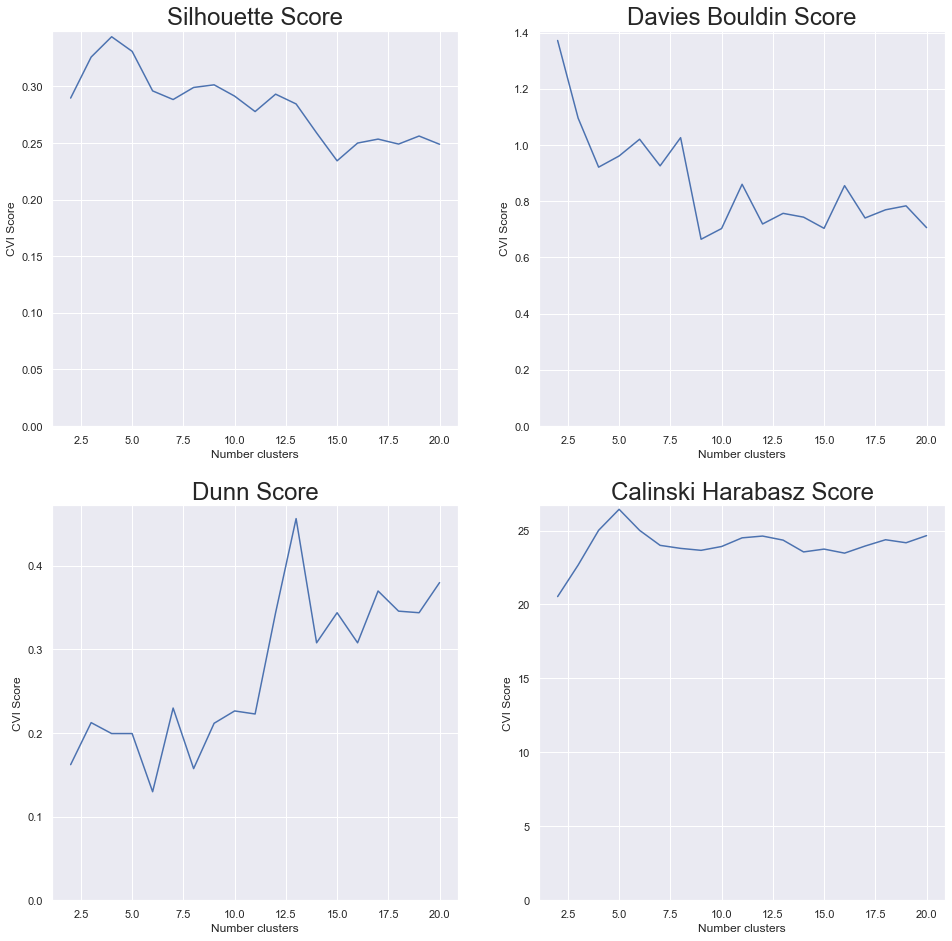

In [147]:
fig, axs = plt.subplots(2, 2, figsize=(16,16))

x_sil, y_sil = list(zip(*cvi_lists['sil']))
axs[0][0].plot(x_sil, y_sil)
axs[0][0].set_ylim(0, )
axs[0][0].set_title('Silhouette Score', size=24)
axs[0][0].set_xlabel('Number clusters')
axs[0][0].set_ylabel('CVI Score')

x_db, y_db = list(zip(*cvi_lists['db']))
axs[0][1].plot(x_db, y_db)
axs[0][1].set_ylim(0, )
axs[0][1].set_title('Davies Bouldin Score', size=24)
axs[0][1].set_xlabel('Number clusters')
axs[0][1].set_ylabel('CVI Score')

x_dunn, y_dunn = list(zip(*cvi_lists['dunn']))
axs[1][0].plot(x_dunn, y_dunn)
axs[1][0].set_ylim(0, )
axs[1][0].set_title('Dunn Score', size=24)
axs[1][0].set_xlabel('Number clusters')
axs[1][0].set_ylabel('CVI Score')


x_ch, y_ch = list(zip(*cvi_lists['ch']))
axs[1][1].plot(x_ch, y_ch)
axs[1][1].set_ylim(0, )
axs[1][1].set_title('Calinski Harabasz Score', size=24)
axs[1][1].set_xlabel('Number clusters')
axs[1][1].set_ylabel('CVI Score')





## Display Clusters

In [139]:
number_clusters = 13

In [140]:
model = KMeans(n_clusters=number_clusters, random_state=42)

In [141]:
model.fit(dtw_matrix)

KMeans(n_clusters=13, random_state=42)

In [142]:
cluster_labels = model.labels_
cluster_labels

array([11,  8, 10,  1,  9,  0,  6, 10, 10,  4,  0,  2,  1, 10,  9,  2,  2,
        3,  3,  9, 10,  6,  5,  4,  3,  3,  9,  4,  3,  1,  9,  4, 10,  3,
        3, 10,  7,  6,  4,  9,  4,  1,  6, 10,  2,  9,  4,  4, 12,  0],
      dtype=int32)

In [143]:
cluster_names = defaultdict(list)
for i, cid in enumerate(cluster_labels):
    c_name = dfnt.index[i]
    cluster_names[cid].append(c_name)

In [144]:
cluster_names

defaultdict(list,
            {11: ['yyyyy_12'],
             8: ['ggggg_4'],
             10: ['eeeee_12',
              'eeeee_11',
              'eeeee_10',
              'eeeee_15',
              'yyyyy_4',
              'eeeee_4',
              'eeeee_9',
              'xxxxx_6'],
             1: ['eeeee_13', 'eeeee_14', 'eeeee_6', 'eeeee_18'],
             9: ['xxxxx_8',
              'yyyyy_15',
              'yyyyy_16',
              'yyyyy_6',
              'yyyyy_3',
              'xxxxx_1',
              'ttttt_2'],
             0: ['yyyyy_13', 'yyyyy_14', 'xxxxx_4'],
             6: ['yyyyy_11', 'eeeee_1', 'yyyyy_9', 'xxxxx_2'],
             4: ['yyyyy_10',
              'yyyyy_7',
              'yyyyy_2',
              'yyyyy_1',
              'ttttt_4',
              'xxxxx_3',
              'xxxxx_7',
              'xxxxx_5'],
             2: ['ggggg_2', 'ggggg_3', 'ggggg_1', 'ttttt_3'],
             3: ['eeeee_17',
              'eeeee_16',
              'eeeee_2',
    

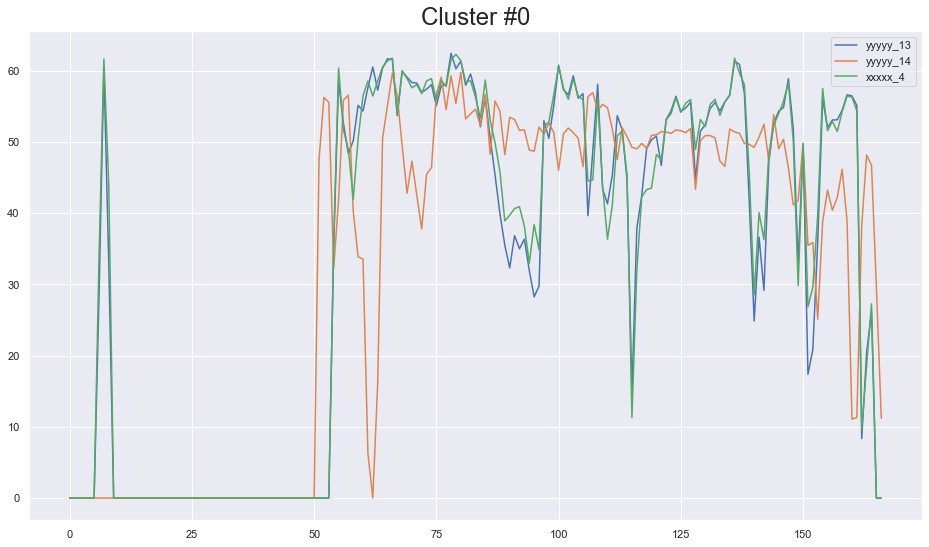

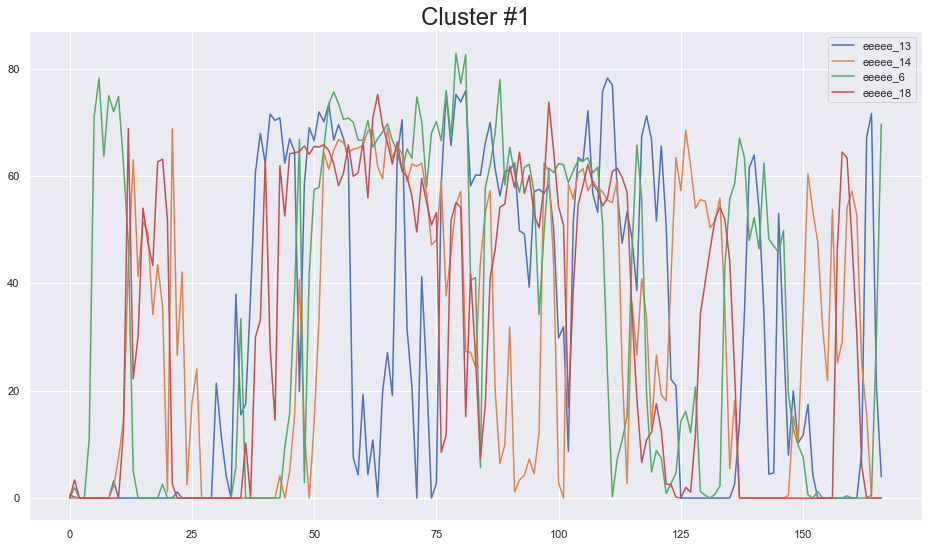

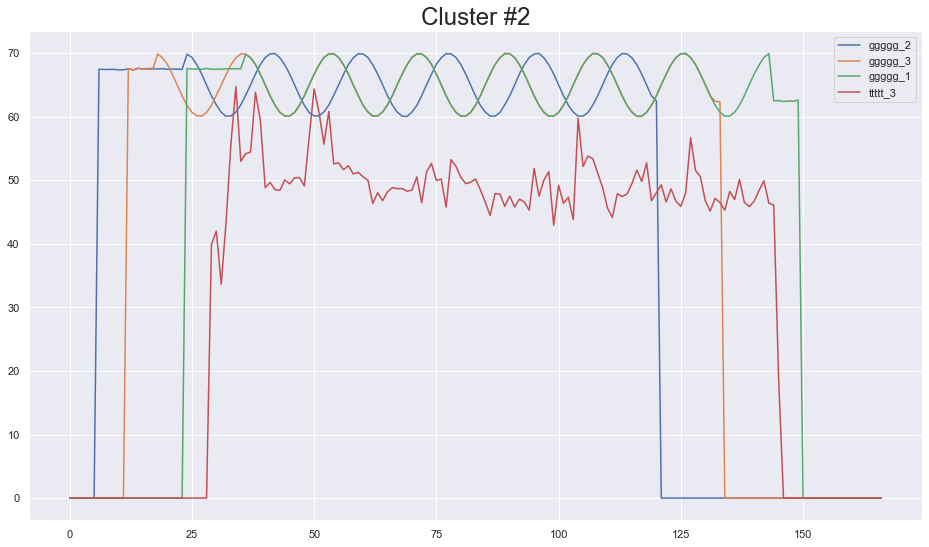

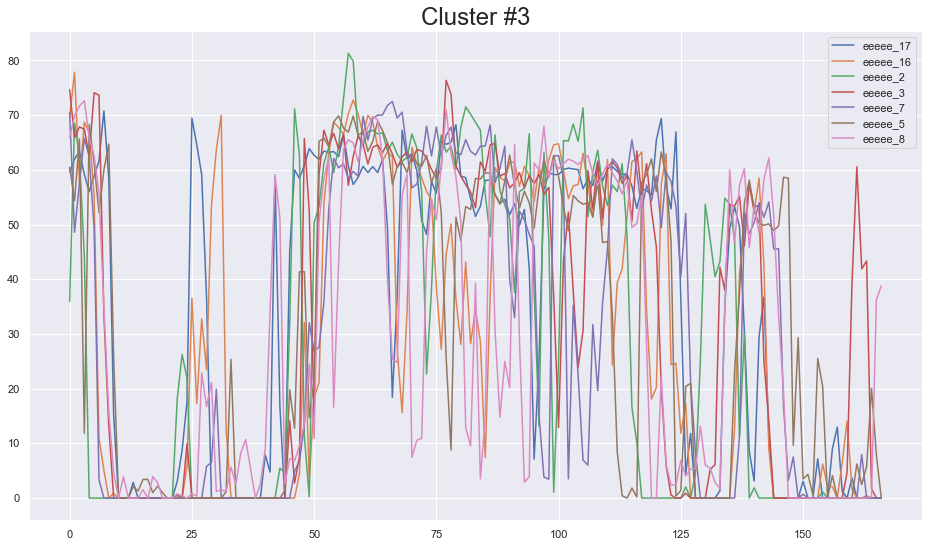

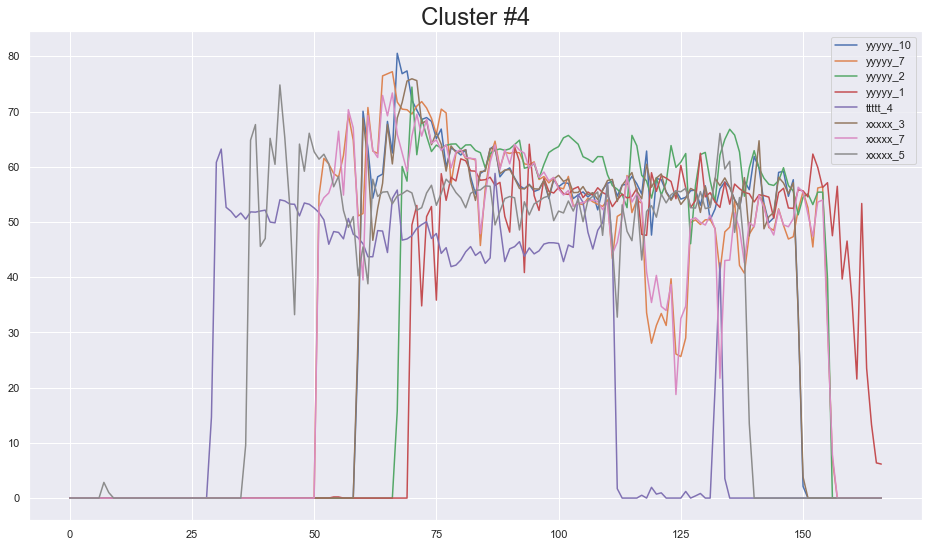

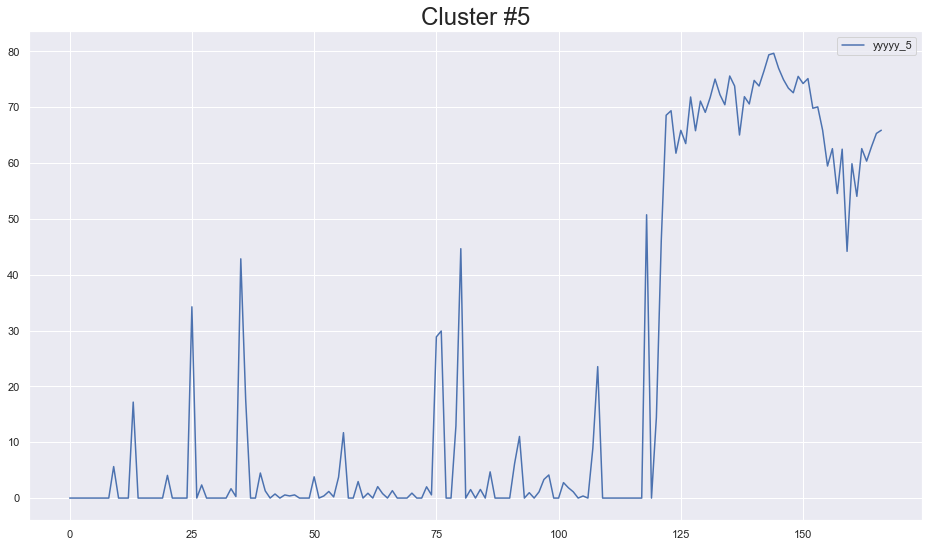

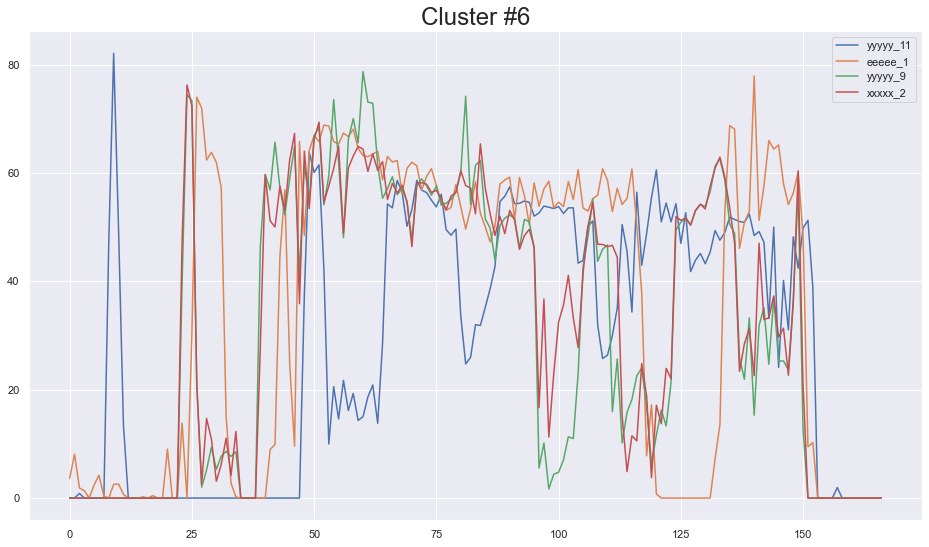

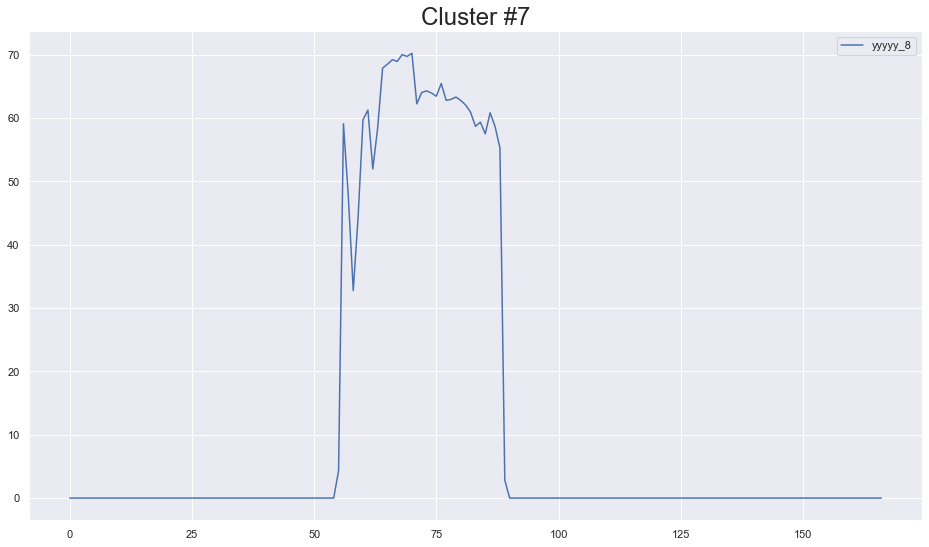

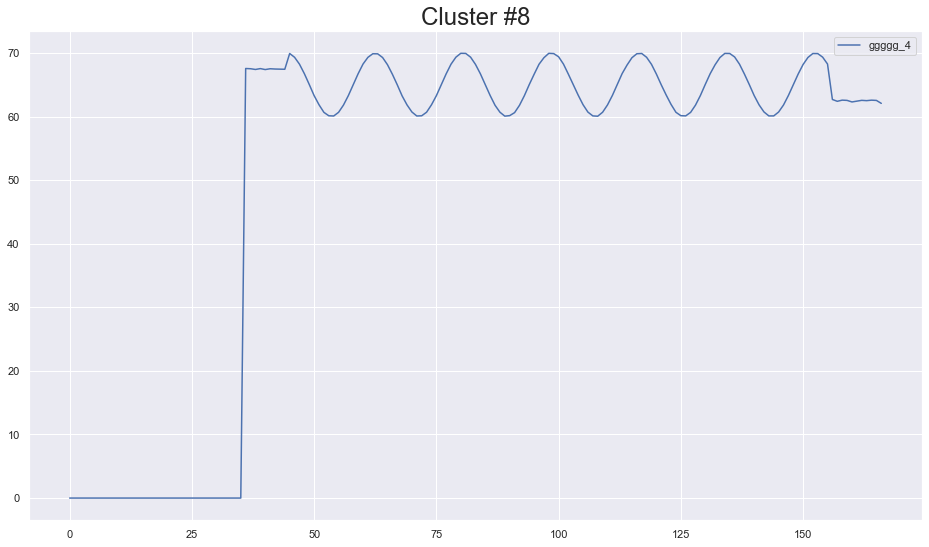

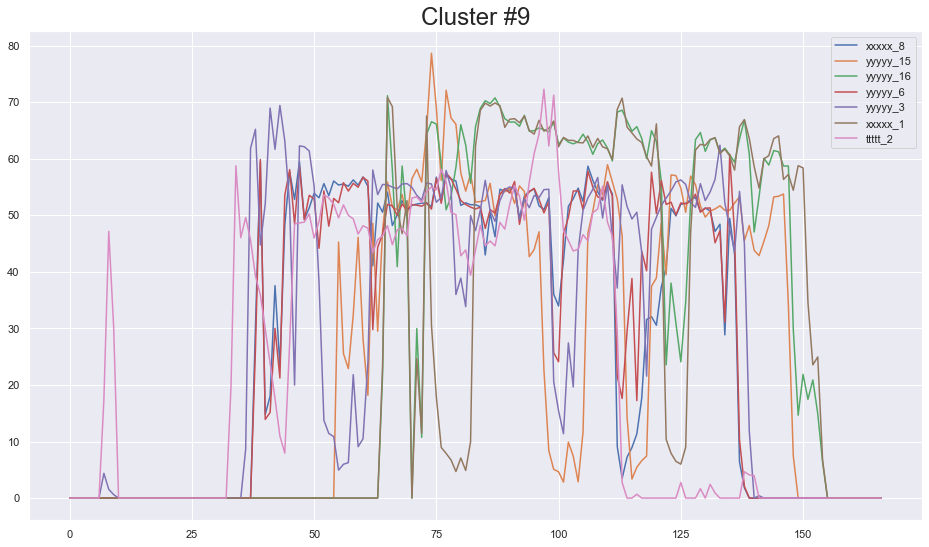

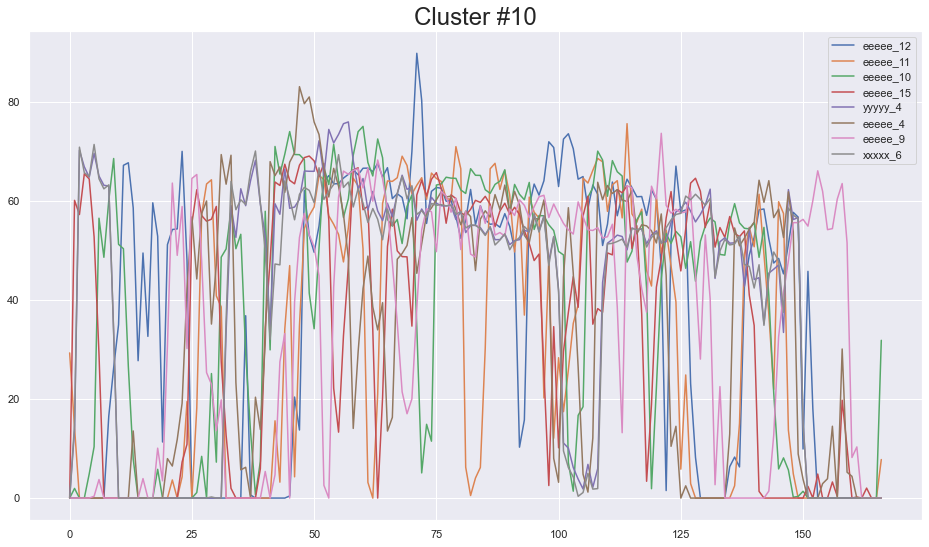

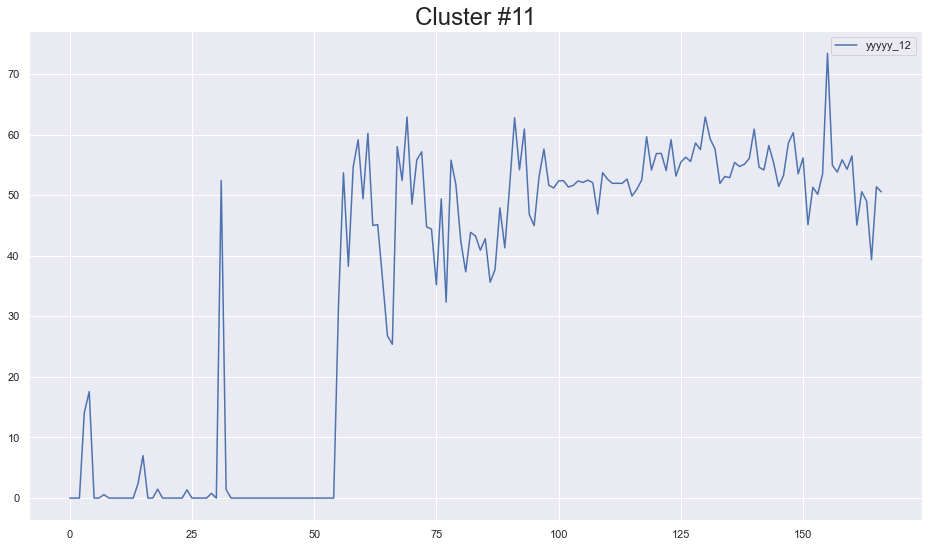

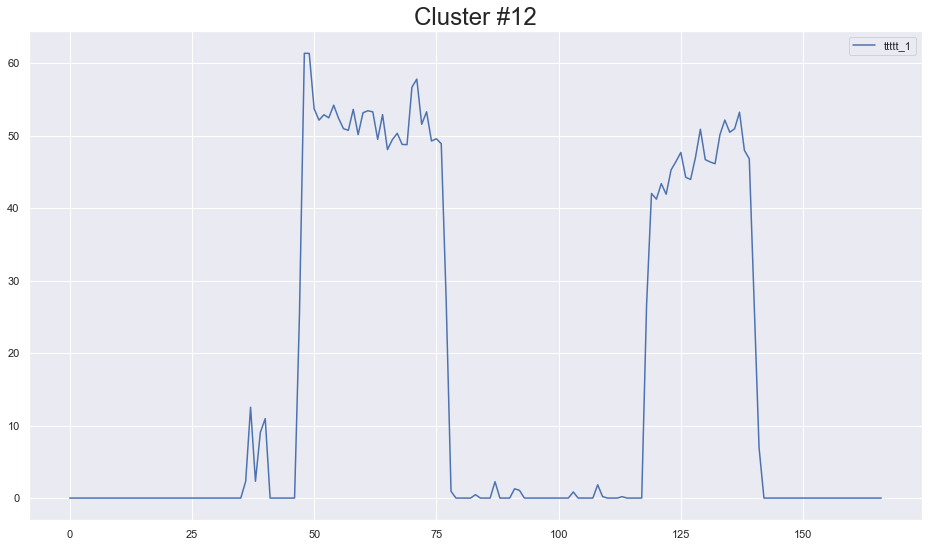

In [145]:
for cluster_id in range(len(cluster_names)):
    names = cluster_names[cluster_id]
    ax = df[[*names]].plot(figsize=(16,9))
    ax.set_title(f"Cluster #{cluster_id}", size=24)
    